In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

<h2 style="color: #E3B340;"> Data collecion

In [2]:
co2 = pd.read_csv('co2_prediction/co2_emissions_tonnes_per_person.csv')

In [3]:
co2.head()

geo  1800  1801  1802  1803  1804  1805  1806  1807  1808  ...  \
0  Afghanistan   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1      Albania   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2      Algeria   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
3      Andorra   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4       Angola   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

     2005    2006    2007   2008   2009   2010   2011  2012   2013   2014  
0  0.0529  0.0637  0.0854  0.154  0.242  0.294  0.412  0.35  0.316  0.299  
1  1.3800  1.2800  1.3000  1.460  1.480  1.560  1.790  1.68  1.730  1.960  
2  3.2200  2.9900  3.1900  3.160  3.420  3.300  3.290  3.46  3.510  3.720  
3  7.3000  6.7500  6.5200  6.430  6.120  6.120  5.870  5.92  5.900  5.830  
4  0.9800  1.1000  1.2000  1.180  1.230  1.240  1.250  1.33  1.250  1.290  

[5 rows x 216 columns]

In [4]:
co2.isnull().sum()

geo       0
1800    187
1801    187
1802    185
1803    187
       ... 
2010      1
2011      1
2012      0
2013      0
2014      0
Length: 216, dtype: int64

In [5]:
#2014 has no null values
master = co2[['geo','2014']]

In [6]:
master.head()

geo   2014
0  Afghanistan  0.299
1      Albania  1.960
2      Algeria  3.720
3      Andorra  5.830
4       Angola  1.290

In [7]:
master = master.rename({'2014':'co2_emissions_tonnes_per_person'},axis=1)

In [8]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 2 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   geo                              192 non-null    object 
 1   co2_emissions_tonnes_per_person  192 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB


<h2 style="color: green;"> there are 192 contries given 
<h4 h2 style="color: magenta;"> now 2nd csv

In [9]:
coal = pd.read_csv('co2_prediction/coal_consumption_per_cap.csv')

In [10]:
coal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 53 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   geo     65 non-null     object 
 1   1965    57 non-null     float64
 2   1966    57 non-null     float64
 3   1967    57 non-null     float64
 4   1968    57 non-null     float64
 5   1969    57 non-null     float64
 6   1970    57 non-null     float64
 7   1971    57 non-null     float64
 8   1972    57 non-null     float64
 9   1973    57 non-null     float64
 10  1974    57 non-null     float64
 11  1975    57 non-null     float64
 12  1976    57 non-null     float64
 13  1977    57 non-null     float64
 14  1978    57 non-null     float64
 15  1979    57 non-null     float64
 16  1980    57 non-null     float64
 17  1981    57 non-null     float64
 18  1982    57 non-null     float64
 19  1983    57 non-null     float64
 20  1984    57 non-null     float64
 21  1985    65 non-null     float64
 22  1986

In [11]:
coal = coal[['geo','2014']]

In [12]:
coal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   geo     65 non-null     object 
 1   2014    65 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


In [13]:
master = pd.merge(master,coal,on='geo',how='outer')

In [14]:
master

geo  co2_emissions_tonnes_per_person     2014
0    Afghanistan                            0.299      NaN
1        Albania                            1.960      NaN
2        Algeria                            3.720  0.00458
3        Andorra                            5.830      NaN
4         Angola                            1.290      NaN
..           ...                              ...      ...
187    Venezuela                            6.030  0.00641
188      Vietnam                            1.800  0.20500
189        Yemen                            0.865      NaN
190       Zambia                            0.288      NaN
191     Zimbabwe                            0.780      NaN

[192 rows x 3 columns]

In [15]:
master = master.rename({'2014':'coal_consumption_per_cap'},axis=1)
master.head()

geo  co2_emissions_tonnes_per_person  coal_consumption_per_cap
0  Afghanistan                            0.299                       NaN
1      Albania                            1.960                       NaN
2      Algeria                            3.720                   0.00458
3      Andorra                            5.830                       NaN
4       Angola                            1.290                       NaN

<h4 h2 style="color: magenta;"> now 3nd csv

In [16]:
electricity = pd.read_csv('co2_prediction/electricity_generation_per_person.csv')

In [17]:
electricity.head()

geo    1985    1986    1987    1988    1989    1990    1991  1992  \
0     Algeria   544.0   559.0   532.0   568.0   607.0   621.0   653.0   673   
1   Argentina  1490.0  1590.0  1660.0  1670.0  1580.0  1560.0  1620.0  1680   
2   Australia  7860.0  8100.0  8360.0  8670.0  9020.0  9130.0  9150.0  9230   
3     Austria  5850.0  5860.0  6610.0  6400.0  6530.0  6530.0  6620.0  6540   
4  Azerbaijan  3110.0  3180.0  3320.0  3360.0  3270.0  3200.0  3170.0  2630   

   1993  ...   2007   2008   2009   2010   2011   2012   2013   2014   2015  \
0   699  ...   1090   1150   1220   1270   1440   1530   1560   1640   1730   
1  1810  ...   2880   3190   3180   3210   3110   3230   3280   3290   3350   
2  9350  ...  11600  11500  11500  11300  11400  11000  10800  10500  10600   
3  6670  ...   7800   8030   8250   8450   7780   8500   7930   7540   7480   
4  2520  ...   2500   2450   2110   2070   2220   2480   2490   2600   2570   

    2016  
0   1730  
1   3350  
2  10600  
3   7760  
4   2570  

[5 rows x 33 columns]

In [18]:
electricity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   geo     65 non-null     object 
 1   1985    65 non-null     float64
 2   1986    65 non-null     float64
 3   1987    65 non-null     float64
 4   1988    65 non-null     float64
 5   1989    65 non-null     float64
 6   1990    65 non-null     float64
 7   1991    65 non-null     float64
 8   1992    65 non-null     int64  
 9   1993    65 non-null     int64  
 10  1994    65 non-null     float64
 11  1995    65 non-null     int64  
 12  1996    65 non-null     float64
 13  1997    65 non-null     float64
 14  1998    65 non-null     int64  
 15  1999    65 non-null     int64  
 16  2000    65 non-null     int64  
 17  2001    65 non-null     int64  
 18  2002    65 non-null     int64  
 19  2003    65 non-null     int64  
 20  2004    65 non-null     int64  
 21  2005    65 non-null     int64  
 22  2006

In [19]:
electricity = electricity[['geo','2014']]

In [20]:
electricity.head()

geo   2014
0     Algeria   1640
1   Argentina   3290
2   Australia  10500
3     Austria   7540
4  Azerbaijan   2600

In [21]:
master = pd.merge(master,electricity,on='geo',how='outer')
master.head()

geo  co2_emissions_tonnes_per_person  coal_consumption_per_cap  \
0  Afghanistan                            0.299                       NaN   
1      Albania                            1.960                       NaN   
2      Algeria                            3.720                   0.00458   
3      Andorra                            5.830                       NaN   
4       Angola                            1.290                       NaN   

     2014  
0     NaN  
1     NaN  
2  1640.0  
3     NaN  
4     NaN

In [22]:
master = master.rename({'2014':'electricity_generation_per_person'},axis=1)
master.head()

geo  co2_emissions_tonnes_per_person  coal_consumption_per_cap  \
0  Afghanistan                            0.299                       NaN   
1      Albania                            1.960                       NaN   
2      Algeria                            3.720                   0.00458   
3      Andorra                            5.830                       NaN   
4       Angola                            1.290                       NaN   

   electricity_generation_per_person  
0                                NaN  
1                                NaN  
2                             1640.0  
3                                NaN  
4                                NaN

<h4 h2 style="color: magenta;"> now 4nd csv

In [23]:
electricity = pd.read_csv('co2_prediction/electricity_use_per_person.csv')

In [24]:
electricity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 56 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   geo     138 non-null    object 
 1   1960    25 non-null     float64
 2   1961    25 non-null     float64
 3   1962    25 non-null     float64
 4   1963    25 non-null     float64
 5   1964    25 non-null     float64
 6   1965    26 non-null     float64
 7   1966    26 non-null     float64
 8   1967    26 non-null     float64
 9   1968    26 non-null     float64
 10  1969    26 non-null     float64
 11  1970    26 non-null     float64
 12  1971    109 non-null    float64
 13  1972    109 non-null    float64
 14  1973    109 non-null    float64
 15  1974    109 non-null    float64
 16  1975    109 non-null    float64
 17  1976    109 non-null    float64
 18  1977    109 non-null    float64
 19  1978    109 non-null    float64
 20  1979    109 non-null    float64
 21  1980    109 non-null    float64
 22  19

In [25]:
electricity = electricity[['geo','2014']]
electricity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   geo     138 non-null    object 
 1   2014    137 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.3+ KB


In [26]:
master = pd.merge(master,electricity,on='geo',how='outer')
master.head()

geo  co2_emissions_tonnes_per_person  coal_consumption_per_cap  \
0  Afghanistan                            0.299                       NaN   
1      Albania                            1.960                       NaN   
2      Algeria                            3.720                   0.00458   
3      Andorra                            5.830                       NaN   
4       Angola                            1.290                       NaN   

   electricity_generation_per_person    2014  
0                                NaN     NaN  
1                                NaN  2310.0  
2                             1640.0  1360.0  
3                                NaN     NaN  
4                                NaN   312.0

In [27]:
master = master.rename({'2014':'electricity_use_per_person'},axis=1)
master.head()

geo  co2_emissions_tonnes_per_person  coal_consumption_per_cap  \
0  Afghanistan                            0.299                       NaN   
1      Albania                            1.960                       NaN   
2      Algeria                            3.720                   0.00458   
3      Andorra                            5.830                       NaN   
4       Angola                            1.290                       NaN   

   electricity_generation_per_person  electricity_use_per_person  
0                                NaN                         NaN  
1                                NaN                      2310.0  
2                             1640.0                      1360.0  
3                                NaN                         NaN  
4                                NaN                       312.0

<h4 h2 style="color: magenta;"> now 5nd csv

In [28]:
forest = pd.read_csv('co2_prediction/forest_coverage_percent.csv')

In [29]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   geo     192 non-null    object 
 1   1990    162 non-null    float64
 2   1991    165 non-null    float64
 3   1992    184 non-null    float64
 4   1993    188 non-null    float64
 5   1994    188 non-null    float64
 6   1995    188 non-null    float64
 7   1996    188 non-null    float64
 8   1997    188 non-null    float64
 9   1998    188 non-null    float64
 10  1999    188 non-null    float64
 11  2000    190 non-null    float64
 12  2001    190 non-null    float64
 13  2002    190 non-null    float64
 14  2003    190 non-null    float64
 15  2004    190 non-null    float64
 16  2005    190 non-null    float64
 17  2006    192 non-null    float64
 18  2007    192 non-null    float64
 19  2008    192 non-null    float64
 20  2009    192 non-null    float64
 21  2010    192 non-null    float64
 22  20

In [30]:
forest = forest[['geo','2014']]
master = pd.merge(master,forest,on='geo',how='outer')
master = master.rename({'2014':'forest_coverage_percent'},axis=1)

In [31]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   geo                                193 non-null    object 
 1   co2_emissions_tonnes_per_person    192 non-null    float64
 2   coal_consumption_per_cap           65 non-null     float64
 3   electricity_generation_per_person  65 non-null     float64
 4   electricity_use_per_person         137 non-null    float64
 5   forest_coverage_percent            191 non-null    float64
dtypes: float64(5), object(1)
memory usage: 10.6+ KB


<h4 style="color: magenta;"> now 6nd csv

In [32]:
hydro = pd.read_csv('co2_prediction/hydro_power_generation_per_person.csv')

In [33]:
hydro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 53 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   geo     118 non-null    object 
 1   1960    24 non-null     float64
 2   1961    24 non-null     float64
 3   1962    24 non-null     float64
 4   1963    24 non-null     float64
 5   1964    24 non-null     float64
 6   1965    25 non-null     float64
 7   1966    25 non-null     float64
 8   1967    25 non-null     float64
 9   1968    25 non-null     float64
 10  1969    25 non-null     float64
 11  1970    25 non-null     float64
 12  1971    88 non-null     float64
 13  1972    89 non-null     float64
 14  1973    90 non-null     float64
 15  1974    90 non-null     float64
 16  1975    90 non-null     float64
 17  1976    90 non-null     float64
 18  1977    90 non-null     float64
 19  1978    90 non-null     float64
 20  1979    90 non-null     float64
 21  1980    90 non-null     float64
 22  19

<h4 style="background-color:black; color:orange;
 margin=50px;"> data for 2014 is unavailable so we are not going to use this data

<h4 style="color: magenta;"> now 7nd csv

In [34]:
income = pd.read_csv('co2_prediction/income_per_person_gdppercapita_ppp_inflation_adjusted.csv')

In [35]:
income.head()

geo  1800  1801  1802  1803  1804  1805  1806  1807  1808  ...  \
0  Afghanistan   603   603   603   603   603   603   603   603   603  ...   
1      Albania   667   667   667   667   667   668   668   668   668  ...   
2      Algeria   715   716   717   718   719   720   721   722   723  ...   
3      Andorra  1200  1200  1200  1200  1210  1210  1210  1210  1220  ...   
4       Angola   618   620   623   626   628   631   634   637   640  ...   

    2009   2010   2011   2012   2013   2014   2015   2016   2017   2018  
0   1530   1610   1660   1840   1810   1780   1750   1740   1800   1870  
1   9530   9930  10200  10400  10500  10700  11000  11400  11900  12400  
2  12600  12900  13000  13200  13300  13500  13700  14000  13800  13700  
3  41700  39000  42000  41900  43700  44900  46600  48200  49800  51500  
4   5910   5900   5910   6000   6190   6260   6230   6030   5940   5850  

[5 rows x 220 columns]

In [36]:
income = income[['geo','2014']]
master = pd.merge(master,income,on='geo',how='outer')
master = master.rename({'2014':'income_per_person_gdppercapita_ppp_inflation_adjusted'},axis=1)
master.head()

geo  co2_emissions_tonnes_per_person  coal_consumption_per_cap  \
0  Afghanistan                            0.299                       NaN   
1      Albania                            1.960                       NaN   
2      Algeria                            3.720                   0.00458   
3      Andorra                            5.830                       NaN   
4       Angola                            1.290                       NaN   

   electricity_generation_per_person  electricity_use_per_person  \
0                                NaN                         NaN   
1                                NaN                      2310.0   
2                             1640.0                      1360.0   
3                                NaN                         NaN   
4                                NaN                       312.0   

   forest_coverage_percent  \
0                     2.07   
1                    28.20   
2                     0.82   
3                    34.00   
4                    46.50   

   income_per_person_gdppercapita_ppp_inflation_adjusted  
0                                             1780.0      
1                                            10700.0      
2                                            13500.0      
3                                            44900.0      
4                                             6260.0

<h4 style="color: magenta;"> now 8nd csv

In [37]:
industry = pd.read_csv('co2_prediction/industry_percent_of_gdp.csv')

In [38]:
industry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 59 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   geo     189 non-null    object 
 1   1960    40 non-null     float64
 2   1961    42 non-null     float64
 3   1962    42 non-null     float64
 4   1963    44 non-null     float64
 5   1964    46 non-null     float64
 6   1965    64 non-null     float64
 7   1966    67 non-null     float64
 8   1967    68 non-null     float64
 9   1968    71 non-null     float64
 10  1969    72 non-null     float64
 11  1970    80 non-null     float64
 12  1971    81 non-null     float64
 13  1972    81 non-null     float64
 14  1973    81 non-null     float64
 15  1974    82 non-null     float64
 16  1975    86 non-null     float64
 17  1976    89 non-null     float64
 18  1977    95 non-null     float64
 19  1978    97 non-null     float64
 20  1979    97 non-null     float64
 21  1980    106 non-null    float64
 22  19

In [39]:
industry = industry[['geo','2014']]
master = pd.merge(master,industry,on='geo',how='outer')
master = master.rename({'2014':'industry_percent_of_gdp'},axis=1)
master.head()

geo  co2_emissions_tonnes_per_person  coal_consumption_per_cap  \
0  Afghanistan                            0.299                       NaN   
1      Albania                            1.960                       NaN   
2      Algeria                            3.720                   0.00458   
3      Andorra                            5.830                       NaN   
4       Angola                            1.290                       NaN   

   electricity_generation_per_person  electricity_use_per_person  \
0                                NaN                         NaN   
1                                NaN                      2310.0   
2                             1640.0                      1360.0   
3                                NaN                         NaN   
4                                NaN                       312.0   

   forest_coverage_percent  \
0                     2.07   
1                    28.20   
2                     0.82   
3                    34.00   
4                    46.50   

   income_per_person_gdppercapita_ppp_inflation_adjusted  \
0                                             1780.0       
1                                            10700.0       
2                                            13500.0       
3                                            44900.0       
4                                             6260.0       

   industry_percent_of_gdp  
0                    21.10  
1                    21.50  
2                    42.30  
3                     9.91  
4                      NaN

<h4 style="color: magenta;"> now 9nd csv

In [40]:
natural= pd.read_csv('co2_prediction/natural_gas_production_per_person.csv')

In [41]:
natural.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 48 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   geo     49 non-null     object 
 1   1970    43 non-null     float64
 2   1971    43 non-null     float64
 3   1972    43 non-null     float64
 4   1973    43 non-null     float64
 5   1974    43 non-null     float64
 6   1975    43 non-null     float64
 7   1976    43 non-null     float64
 8   1977    43 non-null     float64
 9   1978    43 non-null     float64
 10  1979    43 non-null     float64
 11  1980    43 non-null     float64
 12  1981    43 non-null     float64
 13  1982    43 non-null     float64
 14  1983    43 non-null     float64
 15  1984    43 non-null     float64
 16  1985    49 non-null     float64
 17  1986    49 non-null     float64
 18  1987    49 non-null     float64
 19  1988    49 non-null     float64
 20  1989    49 non-null     float64
 21  1990    49 non-null     float64
 22  1991

In [42]:
natural = natural[['geo','2014']]
master = pd.merge(master,natural,on='geo',how='outer')
master = master.rename({'2014':'natural_gas_production_per_person'},axis=1)
master.head()

geo  co2_emissions_tonnes_per_person  coal_consumption_per_cap  \
0  Afghanistan                            0.299                       NaN   
1      Albania                            1.960                       NaN   
2      Algeria                            3.720                   0.00458   
3      Andorra                            5.830                       NaN   
4       Angola                            1.290                       NaN   

   electricity_generation_per_person  electricity_use_per_person  \
0                                NaN                         NaN   
1                                NaN                      2310.0   
2                             1640.0                      1360.0   
3                                NaN                         NaN   
4                                NaN                       312.0   

   forest_coverage_percent  \
0                     2.07   
1                    28.20   
2                     0.82   
3                    34.00   
4                    46.50   

   income_per_person_gdppercapita_ppp_inflation_adjusted  \
0                                             1780.0       
1                                            10700.0       
2                                            13500.0       
3                                            44900.0       
4                                             6260.0       

   industry_percent_of_gdp  natural_gas_production_per_person  
0                    21.10                                NaN  
1                    21.50                                NaN  
2                    42.30                               1.92  
3                     9.91                                NaN  
4                      NaN                                NaN

<h4 style="color: magenta;"> now 10nd csv


In [43]:
oil = pd.read_csv('co2_prediction/oil_consumption_per_cap.csv')

In [44]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 53 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   geo     65 non-null     object 
 1   1965    56 non-null     float64
 2   1966    56 non-null     float64
 3   1967    56 non-null     float64
 4   1968    56 non-null     float64
 5   1969    56 non-null     float64
 6   1970    56 non-null     float64
 7   1971    57 non-null     float64
 8   1972    57 non-null     float64
 9   1973    57 non-null     float64
 10  1974    57 non-null     float64
 11  1975    57 non-null     float64
 12  1976    57 non-null     float64
 13  1977    57 non-null     float64
 14  1978    57 non-null     float64
 15  1979    57 non-null     float64
 16  1980    57 non-null     float64
 17  1981    57 non-null     float64
 18  1982    57 non-null     float64
 19  1983    57 non-null     float64
 20  1984    57 non-null     float64
 21  1985    65 non-null     float64
 22  1986

In [45]:
oil = oil[['geo','2014']]
master = pd.merge(master,oil,on='geo',how='outer')
master = master.rename({'2014':'oil_consumption_per_cap'},axis=1)
master.head()

geo  co2_emissions_tonnes_per_person  coal_consumption_per_cap  \
0  Afghanistan                            0.299                       NaN   
1      Albania                            1.960                       NaN   
2      Algeria                            3.720                   0.00458   
3      Andorra                            5.830                       NaN   
4       Angola                            1.290                       NaN   

   electricity_generation_per_person  electricity_use_per_person  \
0                                NaN                         NaN   
1                                NaN                      2310.0   
2                             1640.0                      1360.0   
3                                NaN                         NaN   
4                                NaN                       312.0   

   forest_coverage_percent  \
0                     2.07   
1                    28.20   
2                     0.82   
3                    34.00   
4                    46.50   

   income_per_person_gdppercapita_ppp_inflation_adjusted  \
0                                             1780.0       
1                                            10700.0       
2                                            13500.0       
3                                            44900.0       
4                                             6260.0       

   industry_percent_of_gdp  natural_gas_production_per_person  \
0                    21.10                                NaN   
1                    21.50                                NaN   
2                    42.30                               1.92   
3                     9.91                                NaN   
4                      NaN                                NaN   

   oil_consumption_per_cap  
0                      NaN  
1                      NaN  
2                    0.452  
3                      NaN  
4                      NaN

<h4 style="color: magenta;"> now 11nd csv


In [46]:
oil = pd.read_csv("co2_prediction/oil_production_per_person.csv")

In [47]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 53 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   geo     49 non-null     object 
 1   1965    32 non-null     float64
 2   1966    33 non-null     float64
 3   1967    34 non-null     float64
 4   1968    35 non-null     float64
 5   1969    35 non-null     float64
 6   1970    35 non-null     float64
 7   1971    36 non-null     float64
 8   1972    37 non-null     float64
 9   1973    37 non-null     float64
 10  1974    37 non-null     float64
 11  1975    37 non-null     float64
 12  1976    37 non-null     float64
 13  1977    37 non-null     float64
 14  1978    37 non-null     float64
 15  1979    37 non-null     float64
 16  1980    37 non-null     float64
 17  1981    38 non-null     float64
 18  1982    38 non-null     float64
 19  1983    38 non-null     float64
 20  1984    38 non-null     float64
 21  1985    43 non-null     float64
 22  1986

In [48]:
oil = oil[['geo','2014']]
master = pd.merge(master,oil,on='geo',how='outer')
master = master.rename({'2014':'oil_production_per_person'},axis=1)
master.head()

geo  co2_emissions_tonnes_per_person  coal_consumption_per_cap  \
0  Afghanistan                            0.299                       NaN   
1      Albania                            1.960                       NaN   
2      Algeria                            3.720                   0.00458   
3      Andorra                            5.830                       NaN   
4       Angola                            1.290                       NaN   

   electricity_generation_per_person  electricity_use_per_person  \
0                                NaN                         NaN   
1                                NaN                      2310.0   
2                             1640.0                      1360.0   
3                                NaN                         NaN   
4                                NaN                       312.0   

   forest_coverage_percent  \
0                     2.07   
1                    28.20   
2                     0.82   
3                    34.00   
4                    46.50   

   income_per_person_gdppercapita_ppp_inflation_adjusted  \
0                                             1780.0       
1                                            10700.0       
2                                            13500.0       
3                                            44900.0       
4                                             6260.0       

   industry_percent_of_gdp  natural_gas_production_per_person  \
0                    21.10                                NaN   
1                    21.50                                NaN   
2                    42.30                               1.92   
3                     9.91                                NaN   
4                      NaN                                NaN   

   oil_consumption_per_cap  oil_production_per_person  
0                      NaN                        NaN  
1                      NaN                        NaN  
2                    0.452                       1.76  
3                      NaN                        NaN  
4                      NaN                       3.08

<h4 style="color: magenta;"> now 12 csv

In [49]:
year = pd.read_csv('co2_prediction/yearly_co2_emissions_1000_tonnes.csv')

In [50]:
year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Columns: 265 entries, geo to 2014
dtypes: float64(264), object(1)
memory usage: 397.6+ KB


In [51]:
year = year[['geo','2014']]
master = pd.merge(master,year,on='geo',how='outer')
master = master.rename({'2014':'yearly_co2_emissions_1000_tonnes'},axis=1)
master.head()

geo  co2_emissions_tonnes_per_person  coal_consumption_per_cap  \
0  Afghanistan                            0.299                       NaN   
1      Albania                            1.960                       NaN   
2      Algeria                            3.720                   0.00458   
3      Andorra                            5.830                       NaN   
4       Angola                            1.290                       NaN   

   electricity_generation_per_person  electricity_use_per_person  \
0                                NaN                         NaN   
1                                NaN                      2310.0   
2                             1640.0                      1360.0   
3                                NaN                         NaN   
4                                NaN                       312.0   

   forest_coverage_percent  \
0                     2.07   
1                    28.20   
2                     0.82   
3                    34.00   
4                    46.50   

   income_per_person_gdppercapita_ppp_inflation_adjusted  \
0                                             1780.0       
1                                            10700.0       
2                                            13500.0       
3                                            44900.0       
4                                             6260.0       

   industry_percent_of_gdp  natural_gas_production_per_person  \
0                    21.10                                NaN   
1                    21.50                                NaN   
2                    42.30                               1.92   
3                     9.91                                NaN   
4                      NaN                                NaN   

   oil_consumption_per_cap  oil_production_per_person  \
0                      NaN                        NaN   
1                      NaN                        NaN   
2                    0.452                       1.76   
3                      NaN                        NaN   
4                      NaN                       3.08   

   yearly_co2_emissions_1000_tonnes  
0                            9810.0  
1                            5720.0  
2                          145000.0  
3                             462.0  
4                           34800.0

<h4 style="color: magenta;"> now 13nd csv

In [52]:
cars = pd.read_csv('co2_prediction/cars_trucks_and_buses_per_1000_persons.csv')

In [53]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   geo     157 non-null    object 
 1   2002    80 non-null     float64
 2   2003    75 non-null     float64
 3   2004    62 non-null     float64
 4   2005    50 non-null     float64
 5   2006    37 non-null     float64
 6   2007    145 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.7+ KB


<h4 style="background-color:black; color:orange;
 margin=50px;"> data for 2014 is unavailable so we are not going to use this data

In [54]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 193
Data columns (total 12 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   geo                                                    194 non-null    object 
 1   co2_emissions_tonnes_per_person                        192 non-null    float64
 2   coal_consumption_per_cap                               65 non-null     float64
 3   electricity_generation_per_person                      65 non-null     float64
 4   electricity_use_per_person                             137 non-null    float64
 5   forest_coverage_percent                                191 non-null    float64
 6   income_per_person_gdppercapita_ppp_inflation_adjusted  193 non-null    float64
 7   industry_percent_of_gdp                                183 non-null    float64
 8   natural_gas_production_per_person                 

<h3 style="color:#FB6146 ;"> data collection is done now focus on data cleaning

<h2 style="color: #E3B340;"> Data Cleaning

In [55]:
missing = master.isnull()
missing.head()

geo  co2_emissions_tonnes_per_person  coal_consumption_per_cap  \
0  False                            False                      True   
1  False                            False                      True   
2  False                            False                     False   
3  False                            False                      True   
4  False                            False                      True   

   electricity_generation_per_person  electricity_use_per_person  \
0                               True                        True   
1                               True                       False   
2                              False                       False   
3                               True                        True   
4                               True                       False   

   forest_coverage_percent  \
0                    False   
1                    False   
2                    False   
3                    False   
4                    False   

   income_per_person_gdppercapita_ppp_inflation_adjusted  \
0                                              False       
1                                              False       
2                                              False       
3                                              False       
4                                              False       

   industry_percent_of_gdp  natural_gas_production_per_person  \
0                    False                               True   
1                    False                               True   
2                    False                              False   
3                    False                               True   
4                     True                               True   

   oil_consumption_per_cap  oil_production_per_person  \
0                     True                       True   
1                     True                       True   
2                    False                      False   
3                     True                       True   
4                     True                      False   

   yearly_co2_emissions_1000_tonnes  
0                             False  
1                             False  
2                             False  
3                             False  
4                             False

In [56]:
miss = []
for column in missing.columns.values.tolist():
    print(column)
    print(missing[column].value_counts())
    print("")

geo
False    194
Name: geo, dtype: int64

co2_emissions_tonnes_per_person
False    192
True       2
Name: co2_emissions_tonnes_per_person, dtype: int64

coal_consumption_per_cap
True     129
False     65
Name: coal_consumption_per_cap, dtype: int64

electricity_generation_per_person
True     129
False     65
Name: electricity_generation_per_person, dtype: int64

electricity_use_per_person
False    137
True      57
Name: electricity_use_per_person, dtype: int64

forest_coverage_percent
False    191
True       3
Name: forest_coverage_percent, dtype: int64

income_per_person_gdppercapita_ppp_inflation_adjusted
False    193
True       1
Name: income_per_person_gdppercapita_ppp_inflation_adjusted, dtype: int64

industry_percent_of_gdp
False    183
True      11
Name: industry_percent_of_gdp, dtype: int64

natural_gas_production_per_person
True     145
False     49
Name: natural_gas_production_per_person, dtype: int64

oil_consumption_per_cap
True     129
False     65
Name: oil_consumption_pe

In [57]:
#visualisong missing data using missingno 
import missingno as msno

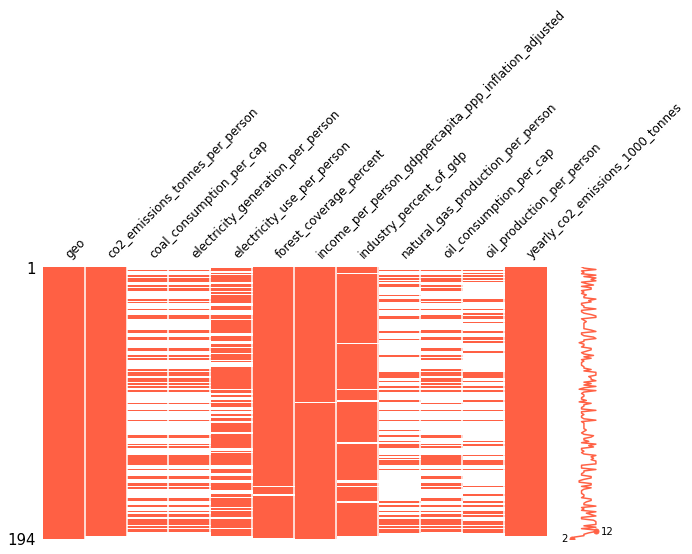

In [58]:
msno.matrix(master , figsize=(10,5), fontsize=12, color=(1, 0.38, 0.27));


<h2 style="color: green;"> the white lines show missigng data
<h3 style="color:#FB6146 ;"> lets add a new column in which we group the countries according to there continent

In [59]:
master['geo'].describe

<bound method NDFrame.describe of 0      Afghanistan
1          Albania
2          Algeria
3          Andorra
4           Angola
          ...     
189          Yemen
190         Zambia
191       Zimbabwe
192     San Marino
193         Monaco
Name: geo, Length: 194, dtype: object>

In [60]:
master['geo'] = master['geo'].str.replace("Congo, Dem. Rep.","Democratic Republic of the Congo")
master['geo'] = master['geo'].str.replace("Congo, Rep.","Republic of the Congo")
master['geo'] = master['geo'].str.replace("Cote d'Ivoire","Côte d'Ivoire")
master['geo'] = master['geo'].str.replace("Micronesia, Fed. Sts.","Federated States of Micronesia")
master['geo'] = master['geo'].str.replace("Lao","Laos")
master['geo'] = master['geo'].str.replace("Macedonia, FYR","North Macedonia")
master['geo'] = master['geo'].str.replace("Micronesia, Fed. Sts.","Federated States of Micronesia")
master['geo'] = master['geo'].str.replace("St. Vincent and the Grenadines","Saint Vincent and the Grenadines")

master['geo'] = master['geo'].str.replace("Timor-Leste","East Timor")

In [61]:
cont =  pd.DataFrame(master.geo)
cont = cont[cont['geo']!='East Timor']


In [62]:
#cont['continent'] = 'nan'
cont.head()

geo
0  Afghanistan
1      Albania
2      Algeria
3      Andorra
4       Angola

In [63]:
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU':  'Europe',
}
countries = cont['geo']

cont['continent']=[continents[country_alpha2_to_continent_code(country_name_to_country_alpha2(country))] for country in countries]

In [64]:
cont.head()

geo continent
0  Afghanistan      Asia
1      Albania    Europe
2      Algeria    Africa
3      Andorra    Europe
4       Angola    Africa

<AxesSubplot:>

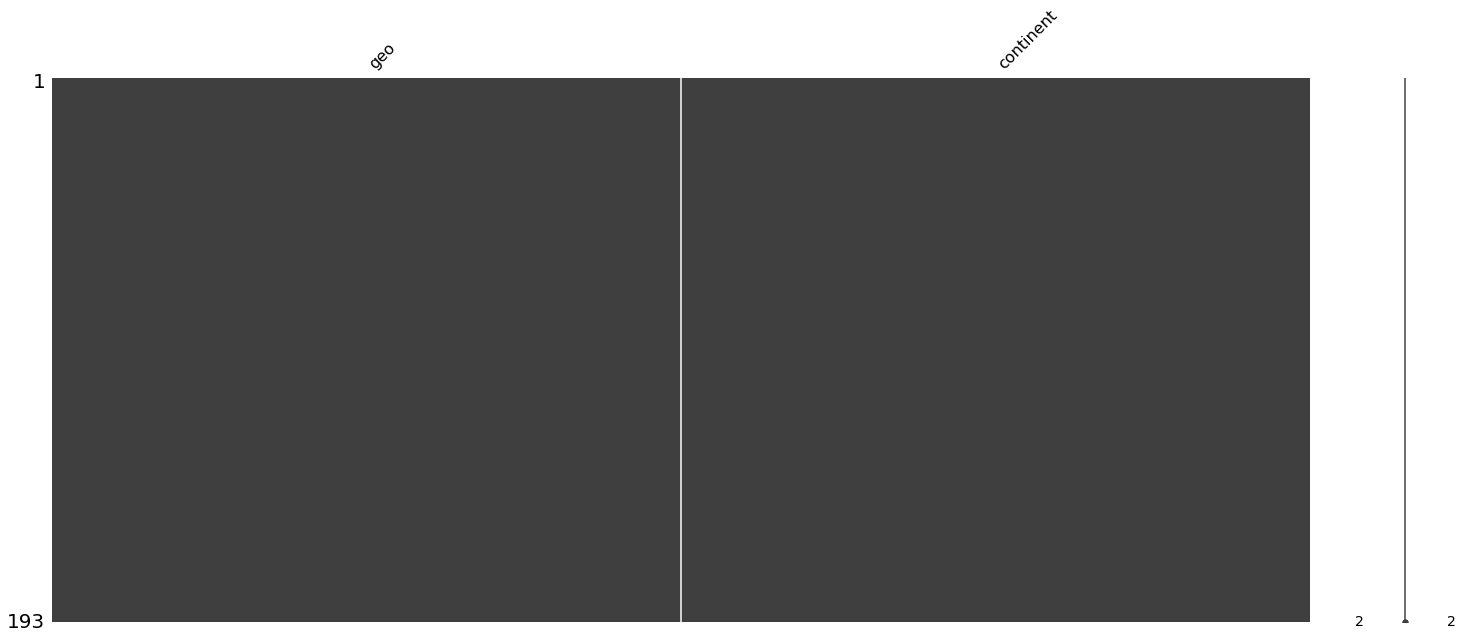

In [65]:
msno.matrix(cont)

In [66]:
#merging the continet with the master dataset
master = pd.merge(master,cont,on='geo',how='outer')

In [67]:
master.head()

geo  co2_emissions_tonnes_per_person  coal_consumption_per_cap  \
0  Afghanistan                            0.299                       NaN   
1      Albania                            1.960                       NaN   
2      Algeria                            3.720                   0.00458   
3      Andorra                            5.830                       NaN   
4       Angola                            1.290                       NaN   

   electricity_generation_per_person  electricity_use_per_person  \
0                                NaN                         NaN   
1                                NaN                      2310.0   
2                             1640.0                      1360.0   
3                                NaN                         NaN   
4                                NaN                       312.0   

   forest_coverage_percent  \
0                     2.07   
1                    28.20   
2                     0.82   
3                    34.00   
4                    46.50   

   income_per_person_gdppercapita_ppp_inflation_adjusted  \
0                                             1780.0       
1                                            10700.0       
2                                            13500.0       
3                                            44900.0       
4                                             6260.0       

   industry_percent_of_gdp  natural_gas_production_per_person  \
0                    21.10                                NaN   
1                    21.50                                NaN   
2                    42.30                               1.92   
3                     9.91                                NaN   
4                      NaN                                NaN   

   oil_consumption_per_cap  oil_production_per_person  \
0                      NaN                        NaN   
1                      NaN                        NaN   
2                    0.452                       1.76   
3                      NaN                        NaN   
4                      NaN                       3.08   

   yearly_co2_emissions_1000_tonnes continent  
0                            9810.0      Asia  
1                            5720.0    Europe  
2                          145000.0    Africa  
3                             462.0    Europe  
4                           34800.0    Africa

<AxesSubplot:>

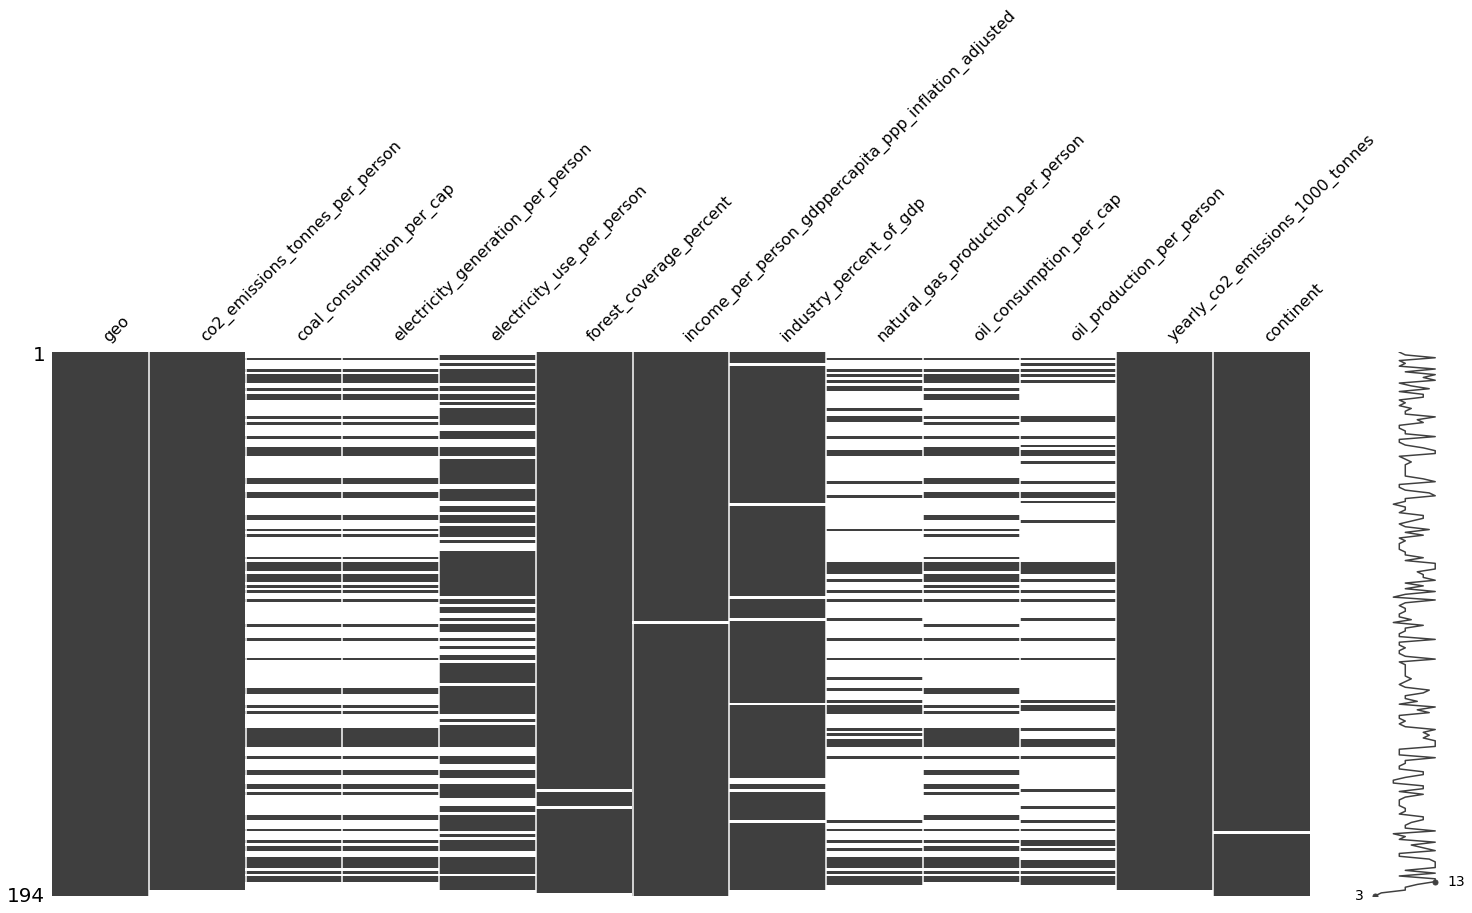

In [68]:
msno.matrix(master)

<AxesSubplot:>

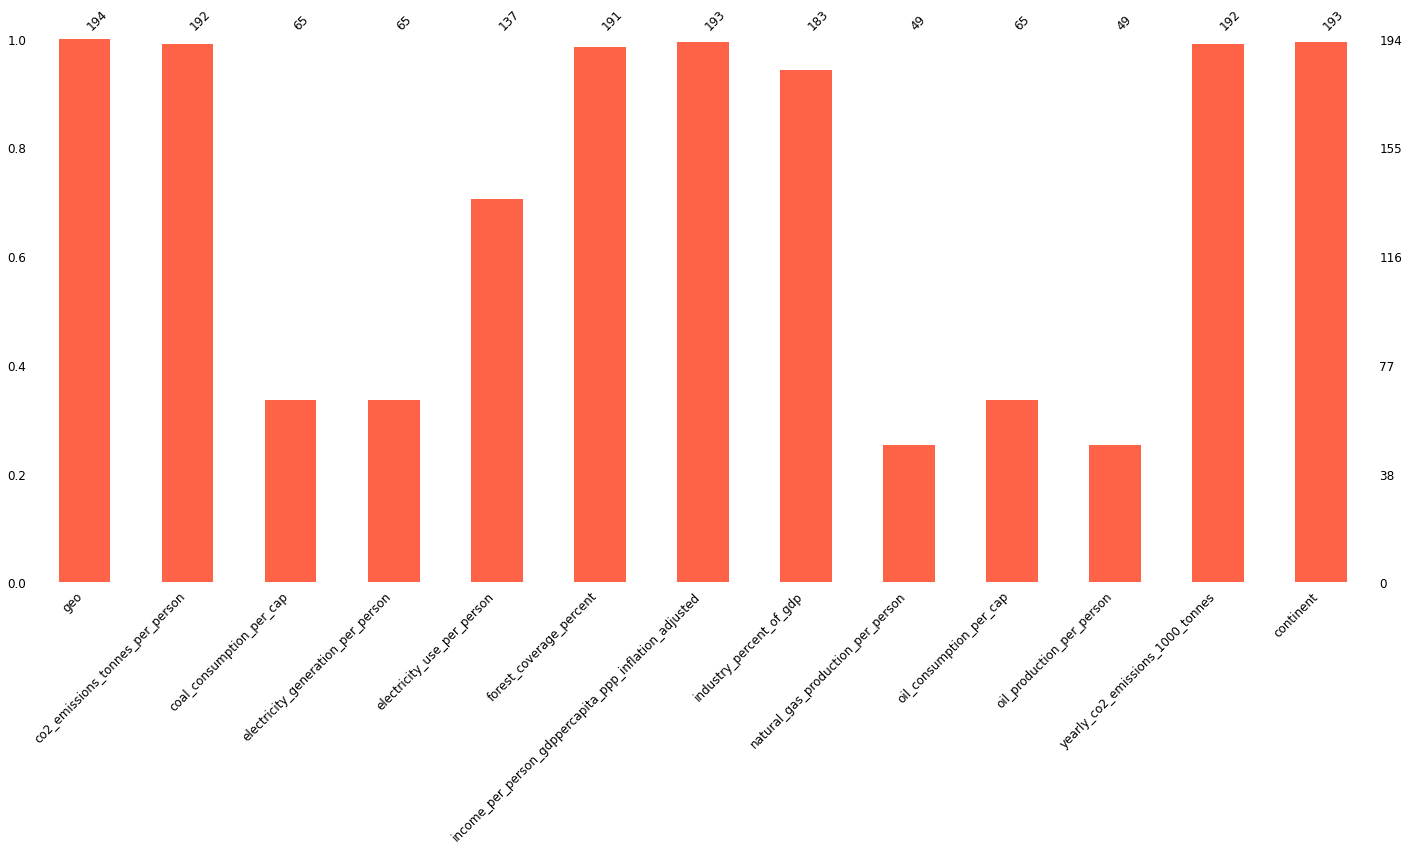

In [69]:
msno.bar(master ,color="tomato", fontsize=12)

In [70]:
master.continent.unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Australia', nan], dtype=object)

In [71]:
master.loc[171]

geo                                                      East Timor
co2_emissions_tonnes_per_person                               0.387
coal_consumption_per_cap                                        NaN
electricity_generation_per_person                               NaN
electricity_use_per_person                                      NaN
forest_coverage_percent                                        46.9
income_per_person_gdppercapita_ppp_inflation_adjusted          2110
industry_percent_of_gdp                                        69.8
natural_gas_production_per_person                               NaN
oil_consumption_per_cap                                         NaN
oil_production_per_person                                       NaN
yearly_co2_emissions_1000_tonnes                                469
continent                                                       NaN
Name: 171, dtype: object

In [72]:
master['continent'] = master['continent'].fillna('Australia')

In [73]:
master.continent.isnull().sum()

0

<h3 style="color:#FB6146 ;"> continent column is added now lets clean all other columns

<AxesSubplot:>

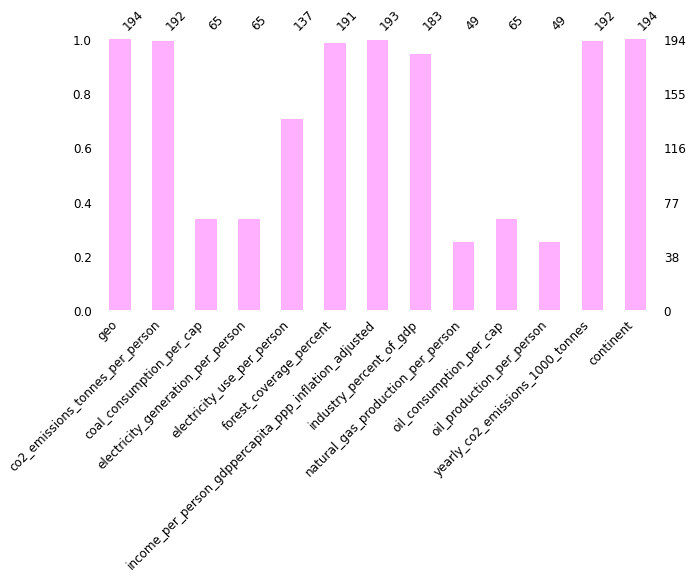

In [74]:
msno.bar(master ,color=(1.0, 0.69, 1.0),figsize=(10,5), fontsize=12,)

In [75]:
plt.figure(figsize=(10,5))
df = px.data.tips()

#lets first fill the missing data of forest_coverage_percent column
fig=px.box(data_frame=master,x='continent',y='electricity_use_per_person',title="electricity used by a perseon in each Continent")

fig.show()

<Figure size 720x360 with 0 Axes>

In [76]:
#based on this we can change the missing data with the median of there each continent
def missing_electricity_fill(cols):
    continen = cols[0]
    elec = cols[1]
    
    if pd.isnull(elec):
        if continen=='Asis':
            return 2370
        elif continen=='Europre':
            return 5130
        elif continen=='Africa':
            return 312
        elif continen=='North America':
            return 1505
        elif continen=='South America':
            return 2600
        else:
            return 9565
    else:
        return elec
    

In [77]:
master['electricity_use_per_person'] = master[['continent','electricity_use_per_person']].apply(missing_electricity_fill,axis=1)

In [78]:
print(master.electricity_use_per_person.isna().sum())

0


<AxesSubplot:>

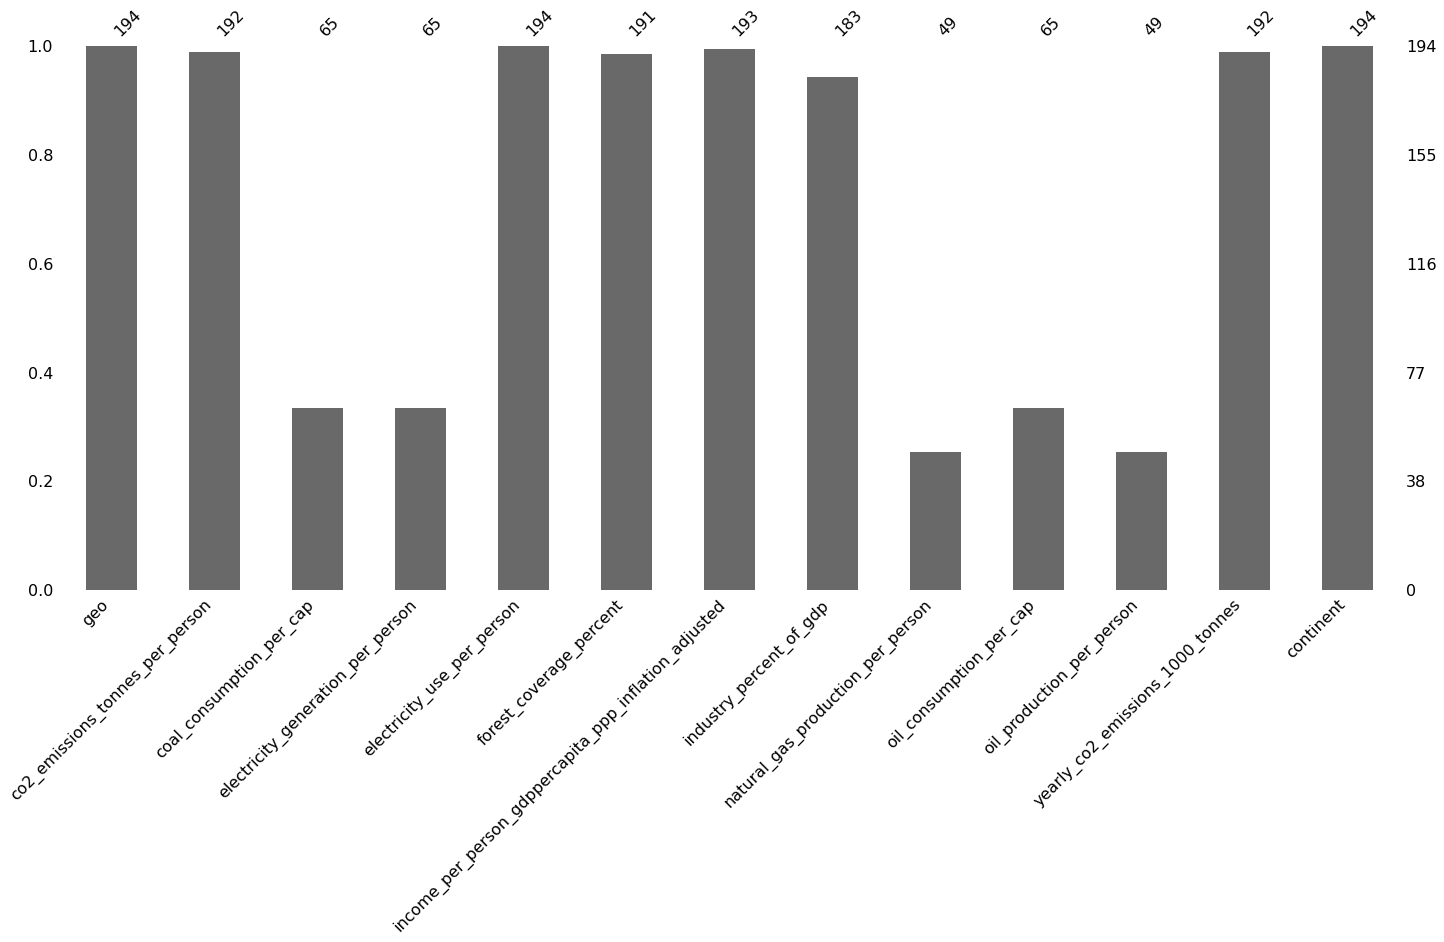

In [79]:
msno.bar(master)

In [80]:
plt.figure(figsize=(10,5))
df = px.data.tips()

#lets first fill the missing data of forest_coverage_percent column
fig=px.box(data_frame=master,x='continent',y='forest_coverage_percent',title="forest coverage for each Continent")

fig.show()

<Figure size 720x360 with 0 Axes>

In [81]:
#based on this we can change the missing data with the median of there each continent
def missing_forset_fill(cols):
    continen = cols[0]
    forest = cols[1]
    
    if pd.isnull(forest):
        if continen=='Asis':
            return 11.7
        elif continen=='Europre':
            return 33.35
        elif continen=='Africa':
            return 20.8
        elif continen=='North America':
            return 38.2
        elif continen=='South America':
            return 51.8
        else:
            return 46.9
    else:
        return forest
    

In [82]:
master['forest_coverage_percent'] = master[['continent','forest_coverage_percent']].apply(missing_forset_fill,axis=1)

<AxesSubplot:>

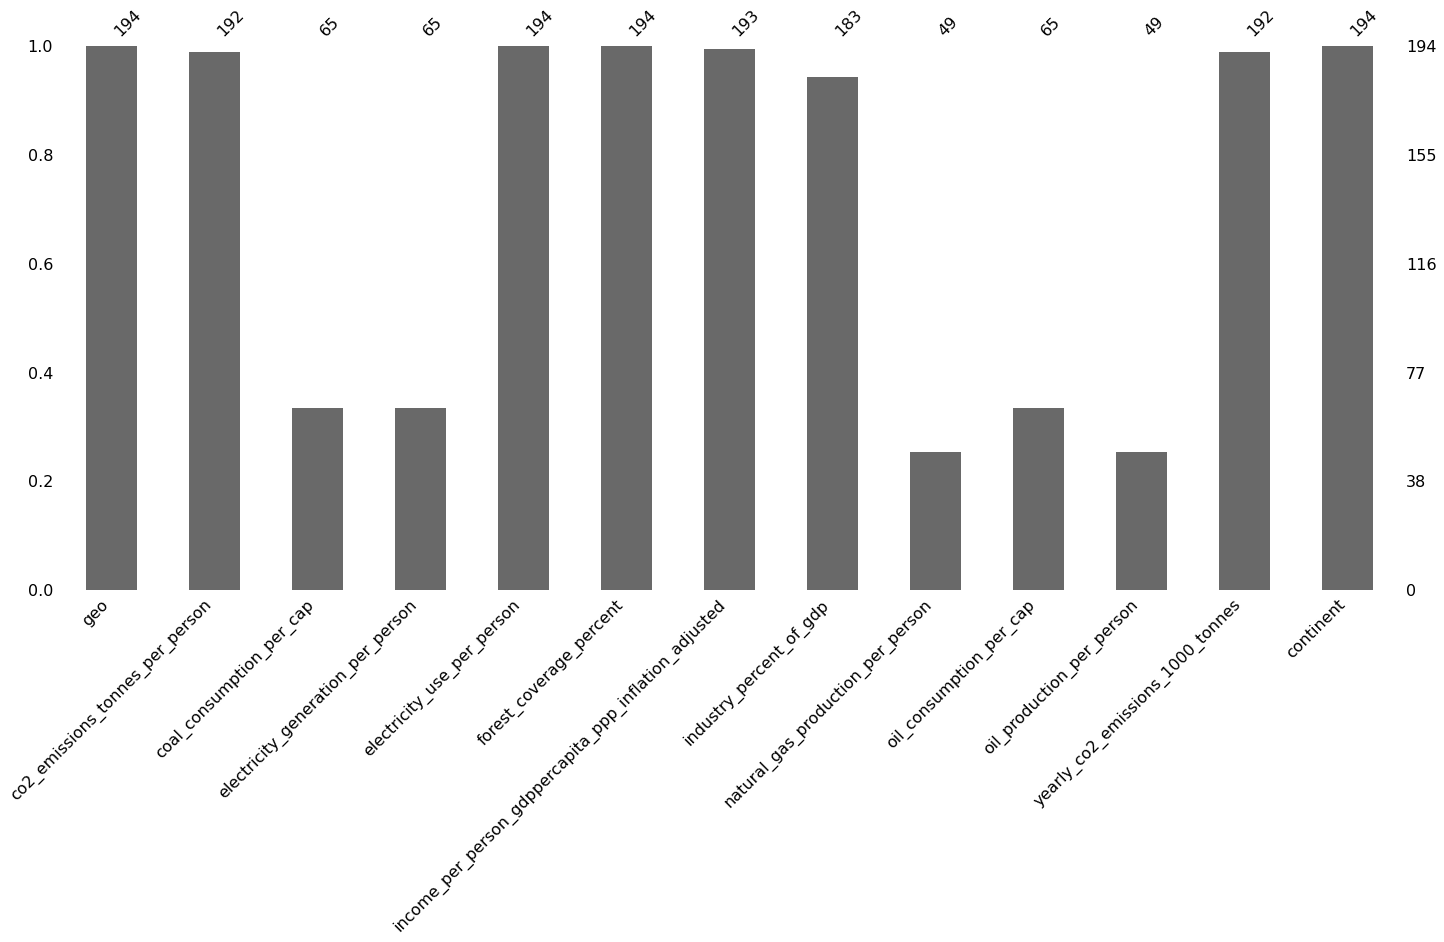

In [83]:
msno.bar(master)

In [84]:
plt.figure(figsize=(10,5))
df = px.data.tips()

#lets first fill the missing data of forest_coverage_percent column
fig=px.box(data_frame=master,x='continent',y='income_per_person_gdppercapita_ppp_inflation_adjusted',title="income per person of each Continent")

fig.show()

<Figure size 720x360 with 0 Axes>

In [85]:

#based on this we can change the missing data with the median of there each continent
def missing_income_fill(cols):
    continen = cols[0]
    income = cols[1]
    
    if pd.isnull(income):
        if continen=='Asis':
            return 11300
        elif continen=='Europre':
            return 28800
        elif continen=='Africa':
            return 2530
        elif continen=='North America':
            return 12600
        elif continen=='South America':
            return 14000
        else:
            return 3660
    else:
        return income
    

In [86]:
master['income_per_person_gdppercapita_ppp_inflation_adjusted'] = master[['continent','income_per_person_gdppercapita_ppp_inflation_adjusted']].apply(missing_income_fill,axis=1)

<AxesSubplot:>

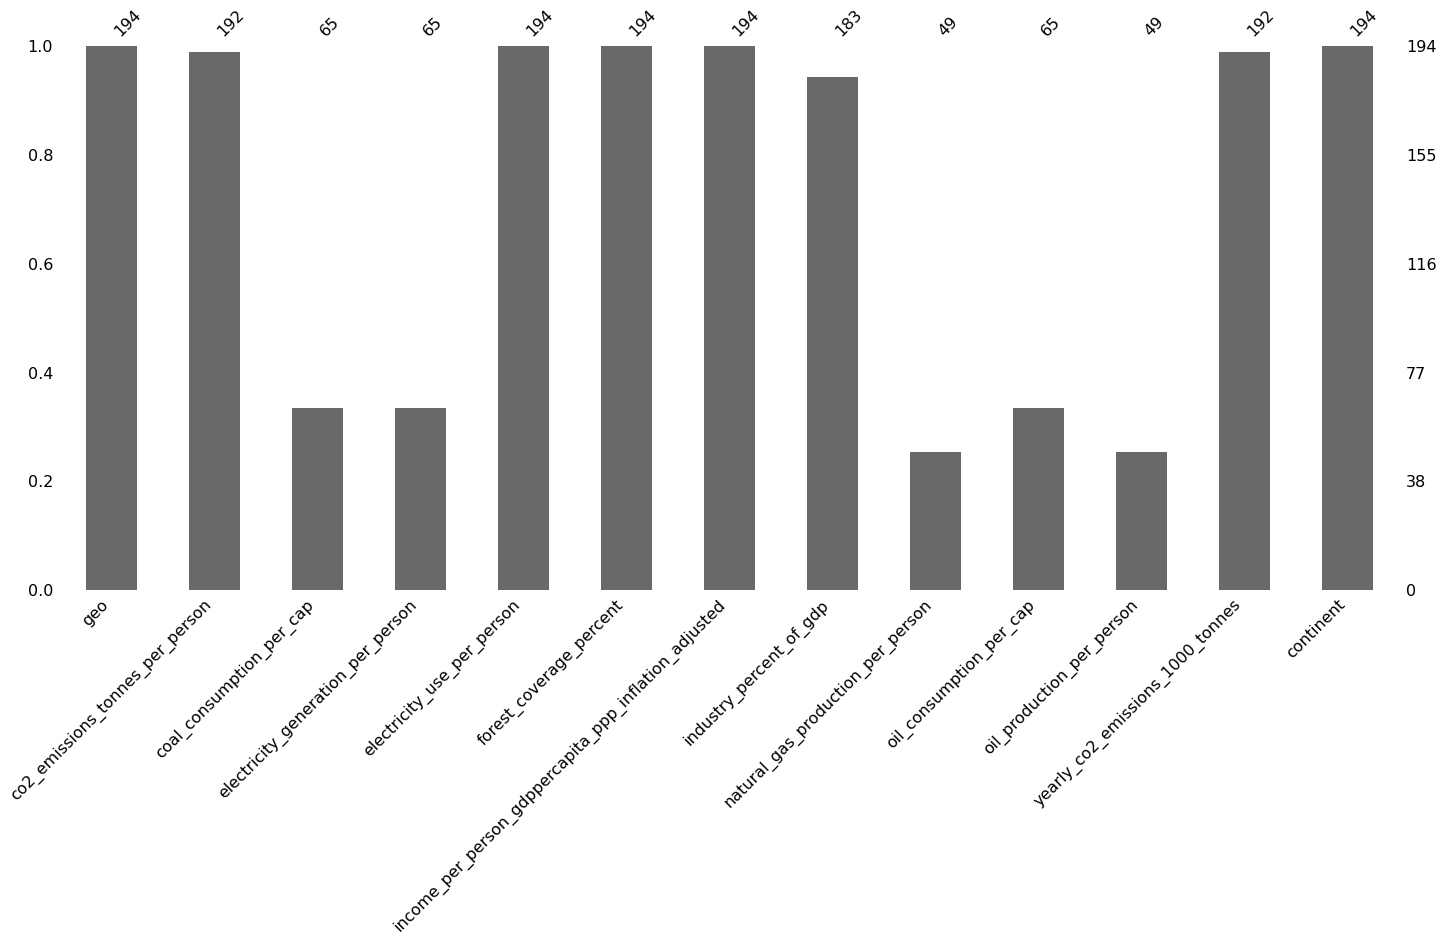

In [87]:
msno.bar(master)

In [88]:
plt.figure(figsize=(10,5))
df = px.data.tips()

#lets first fill the missing data of forest_coverage_percent column
fig=px.box(data_frame=master,x='continent',y='industry_percent_of_gdp',title="industry percent each Continent")

fig.show()

<Figure size 720x360 with 0 Axes>

In [89]:

#based on this we can change the missing data with the median of there each continent
def missing_industry_fill(cols):
    continen = cols[0]
    industry = cols[1]
    
    if pd.isnull(industry):
        if continen=='Asis':
            return 31.3
        elif continen=='Europre':
            return 22.8
        elif continen=='Africa':
            return 20.4
        elif continen=='North America':
            return 22.2
        elif continen=='South America':
            return 29.95
        else:
            return 16.1
    else:
        return industry
    


In [90]:
master['industry_percent_of_gdp'] = master[['continent','industry_percent_of_gdp']].apply(missing_industry_fill,axis=1)

<AxesSubplot:>

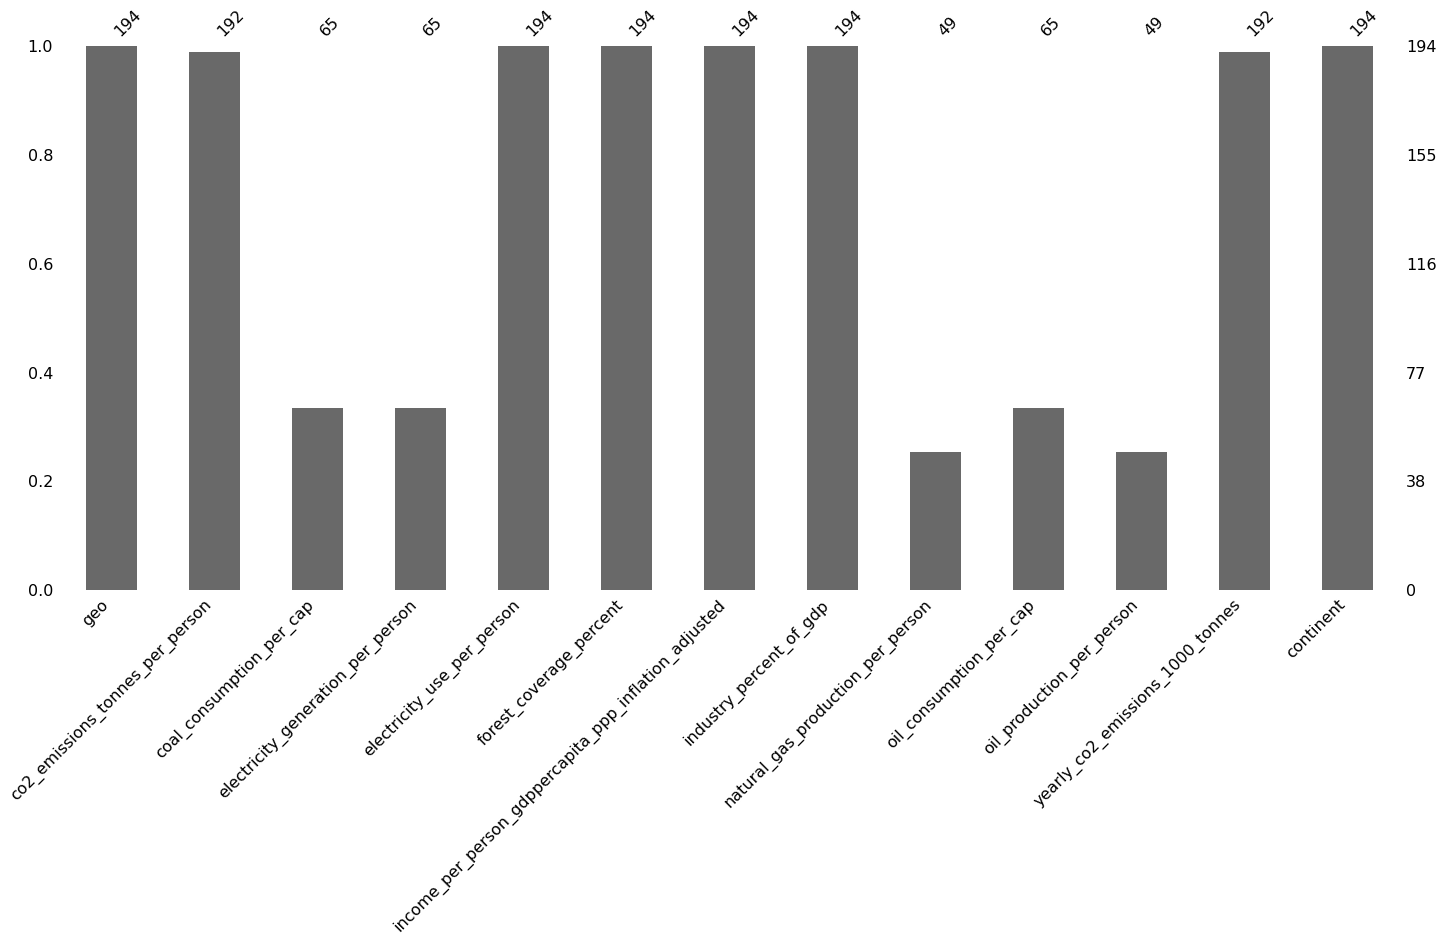

In [91]:
msno.bar(master)

In [92]:
plt.figure(figsize=(10,5))
df = px.data.tips()

#lets first fill the missing data of forest_coverage_percent column
fig=px.box(data_frame=master,x='continent',y='co2_emissions_tonnes_per_person',title="co2 emission of each Continent")

fig.show()

<Figure size 720x360 with 0 Axes>

In [93]:

#based on this we can change the missing data with the median of there each continent
def missing_co2_fill(cols):
    continen = cols[0]
    co2 = cols[1]
    
    if pd.isnull(co2):
        if continen=='Asis':
            return 3.45
        elif continen=='Europre':
            return 5.83
        elif continen=='Africa':
            return 0.385
        elif continen=='North America':
            return 2.28
        elif continen=='South America':
            return 2.61
        else:
            return 1.14
    else:
        return co2
    


In [94]:
master['co2_emissions_tonnes_per_person'] = master[['continent','co2_emissions_tonnes_per_person']].apply(missing_co2_fill,axis=1)

<AxesSubplot:>

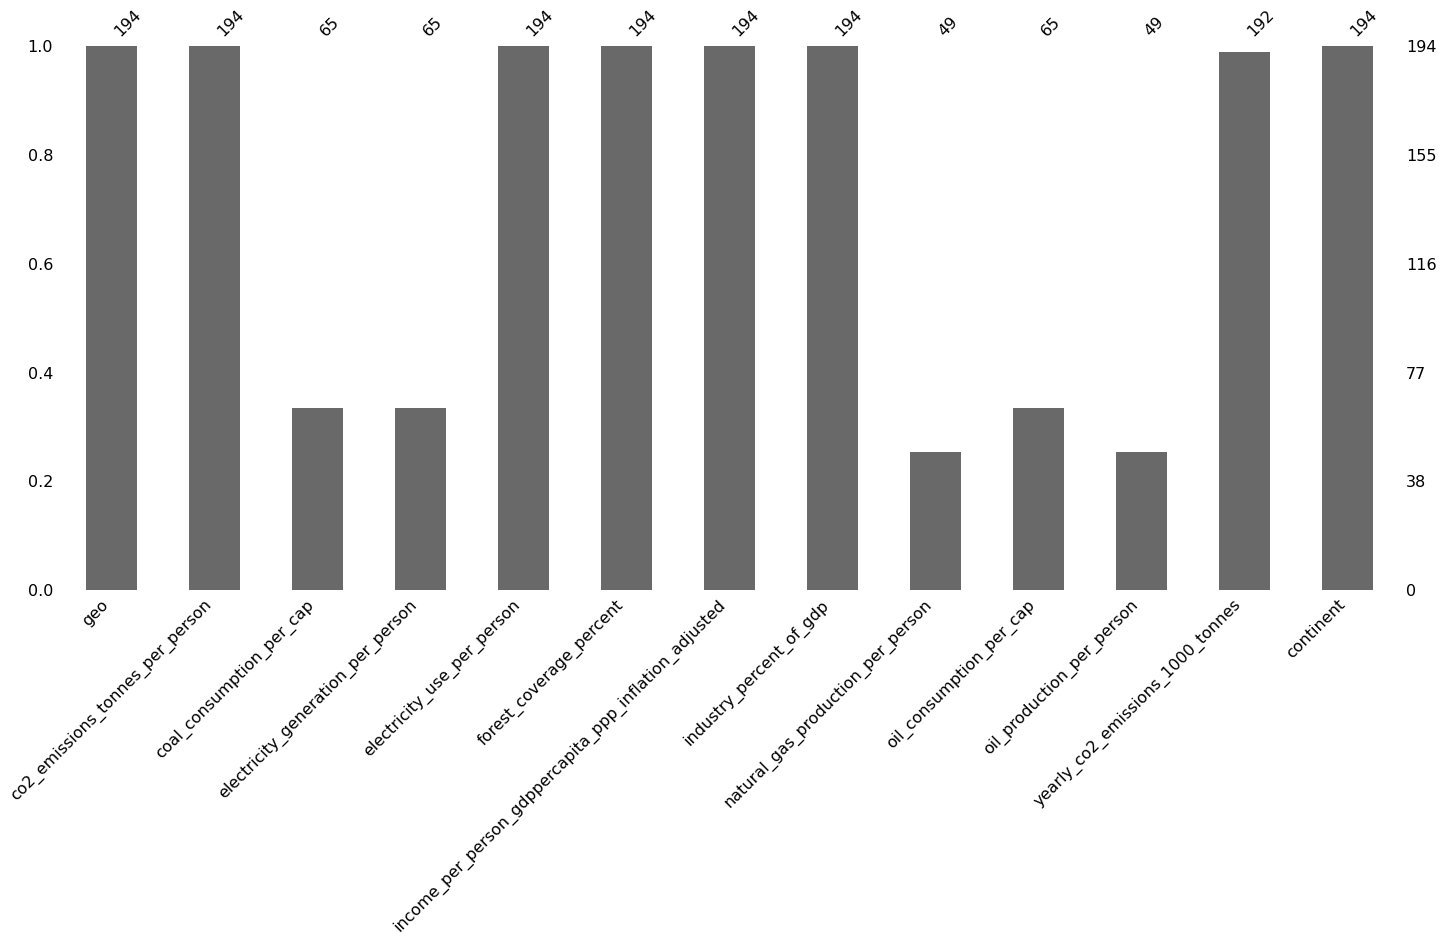

In [95]:
msno.bar(master)

In [96]:
plt.figure(figsize=(10,5))
df = px.data.tips()

#lets first fill the missing data of forest_coverage_percent column
fig=px.box(data_frame=master,x='continent',y='yearly_co2_emissions_1000_tonnes',title="yearly co2 emission of each Continent ")

fig.show()

<Figure size 720x360 with 0 Axes>

In [97]:

#based on this we can change the missing data with the median of there each continent
def missing_year_co2_fill(cols):
    continen = cols[0]
    co2 = cols[1]
    
    if pd.isnull(co2):
        if continen=='Asis':
            return 56400
        elif continen=='Europre':
            return 42100
        elif continen=='Africa':
            return 3425
        elif continen=='North America':
            return 6290
        elif continen=='South America':
            return 52800
        else:
            return 198
    else:
        return co2
    

In [98]:
master['yearly_co2_emissions_1000_tonnes'] = master[['continent','yearly_co2_emissions_1000_tonnes']].apply(missing_year_co2_fill,axis=1)

<AxesSubplot:>

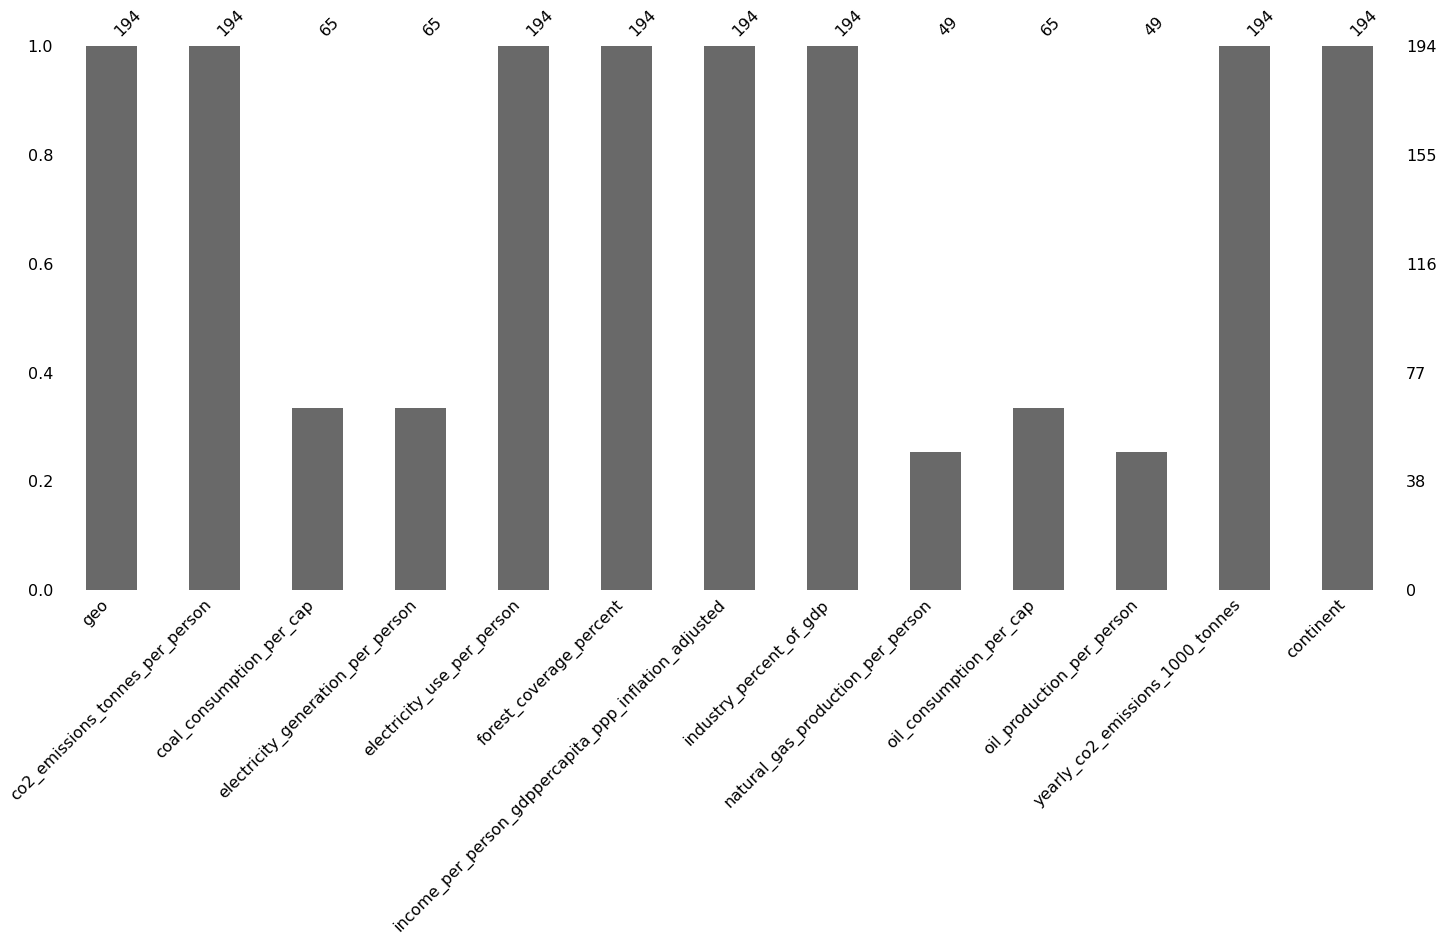

In [99]:
msno.bar(master)

<h3 style="color:#FB6146 ;"> remaing columns have very high missing values due to which we cannot use them 

In [100]:
master.drop(['coal_consumption_per_cap','electricity_generation_per_person','natural_gas_production_per_person','oil_consumption_per_cap','oil_production_per_person'],axis=1,inplace=True)

In [101]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 193
Data columns (total 8 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   geo                                                    194 non-null    object 
 1   co2_emissions_tonnes_per_person                        194 non-null    float64
 2   electricity_use_per_person                             194 non-null    float64
 3   forest_coverage_percent                                194 non-null    float64
 4   income_per_person_gdppercapita_ppp_inflation_adjusted  194 non-null    float64
 5   industry_percent_of_gdp                                194 non-null    float64
 6   yearly_co2_emissions_1000_tonnes                       194 non-null    float64
 7   continent                                              194 non-null    object 
dtypes: float64(6), object(2)
memory usage: 18.6+ KB


In [102]:
master.drop(['geo'],axis=1,inplace=True)

In [103]:
dummy = pd.get_dummies(master['continent'],drop_first=True)

In [104]:
master = pd.concat([master,dummy],axis=1)

In [105]:
master.head()

co2_emissions_tonnes_per_person  electricity_use_per_person  \
0                            0.299                      9565.0   
1                            1.960                      2310.0   
2                            3.720                      1360.0   
3                            5.830                      9565.0   
4                            1.290                       312.0   

   forest_coverage_percent  \
0                     2.07   
1                    28.20   
2                     0.82   
3                    34.00   
4                    46.50   

   income_per_person_gdppercapita_ppp_inflation_adjusted  \
0                                             1780.0       
1                                            10700.0       
2                                            13500.0       
3                                            44900.0       
4                                             6260.0       

   industry_percent_of_gdp  yearly_co2_emissions_1000_tonnes continent  Asia  \
0                    21.10                            9810.0      Asia     1   
1                    21.50                            5720.0    Europe     0   
2                    42.30                          145000.0    Africa     0   
3                     9.91                             462.0    Europe     0   
4                    20.40                           34800.0    Africa     0   

   Australia  Europe  North America  South America  
0          0       0              0              0  
1          0       1              0              0  
2          0       0              0              0  
3          0       1              0              0  
4          0       0              0              0

<h2 style="color: #E3B340;"> Spliting data into test and Traing set

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
df_train, df_test = train_test_split(master, train_size = 0.70, test_size = 0.30, random_state = 100)

In [108]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 28 to 8
Data columns (total 12 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   co2_emissions_tonnes_per_person                        135 non-null    float64
 1   electricity_use_per_person                             135 non-null    float64
 2   forest_coverage_percent                                135 non-null    float64
 3   income_per_person_gdppercapita_ppp_inflation_adjusted  135 non-null    float64
 4   industry_percent_of_gdp                                135 non-null    float64
 5   yearly_co2_emissions_1000_tonnes                       135 non-null    float64
 6   continent                                              135 non-null    object 
 7   Asia                                                   135 non-null    uint8  
 8   Australia                                          

In [109]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 11 to 44
Data columns (total 12 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   co2_emissions_tonnes_per_person                        59 non-null     float64
 1   electricity_use_per_person                             59 non-null     float64
 2   forest_coverage_percent                                59 non-null     float64
 3   income_per_person_gdppercapita_ppp_inflation_adjusted  59 non-null     float64
 4   industry_percent_of_gdp                                59 non-null     float64
 5   yearly_co2_emissions_1000_tonnes                       59 non-null     float64
 6   continent                                              59 non-null     object 
 7   Asia                                                   59 non-null     uint8  
 8   Australia                                          

<h2 style="color: #E3B340;"> Feature Scaling

In [110]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [111]:
df_train[['electricity_use_per_person','forest_coverage_percent','income_per_person_gdppercapita_ppp_inflation_adjusted','industry_percent_of_gdp','yearly_co2_emissions_1000_tonnes']] = scaler.fit_transform(df_train[['electricity_use_per_person','forest_coverage_percent','income_per_person_gdppercapita_ppp_inflation_adjusted','industry_percent_of_gdp','yearly_co2_emissions_1000_tonnes']])

C:\Users\kanan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\kanan\AppData\Roaming\Python\Python36\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [112]:
df_train.head()

co2_emissions_tonnes_per_person  electricity_use_per_person  \
28                            0.4380                    0.004315   
104                           0.0832                    0.005078   
29                            0.3150                    0.004501   
142                           1.0300                    0.177192   
96                            1.1900                    0.177192   

     forest_coverage_percent  \
28                  0.552391   
104                 0.039980   
29                  0.409969   
142                 0.614446   
96                  0.438454   

     income_per_person_gdppercapita_ppp_inflation_adjusted  \
28                                            0.019905       
104                                           0.009512       
29                                            0.018075       
142                                           0.039776       
96                                            0.024394       

     industry_percent_of_gdp  yearly_co2_emissions_1000_tonnes  continent  \
28                  0.292288                          0.000647       Asia   
104                 0.185973                          0.000136     Africa   
29                  0.316090                          0.000679     Africa   
142                 0.308156                          0.000018  Australia   
96                  0.514440                          0.000003     Europe   

     Asia  Australia  Europe  North America  South America  
28      1          0       0              0              0  
104     0          0       0              0              0  
29      0          0       0              0              0  
142     0          1       0              0              0  
96      0          0       1              0              0

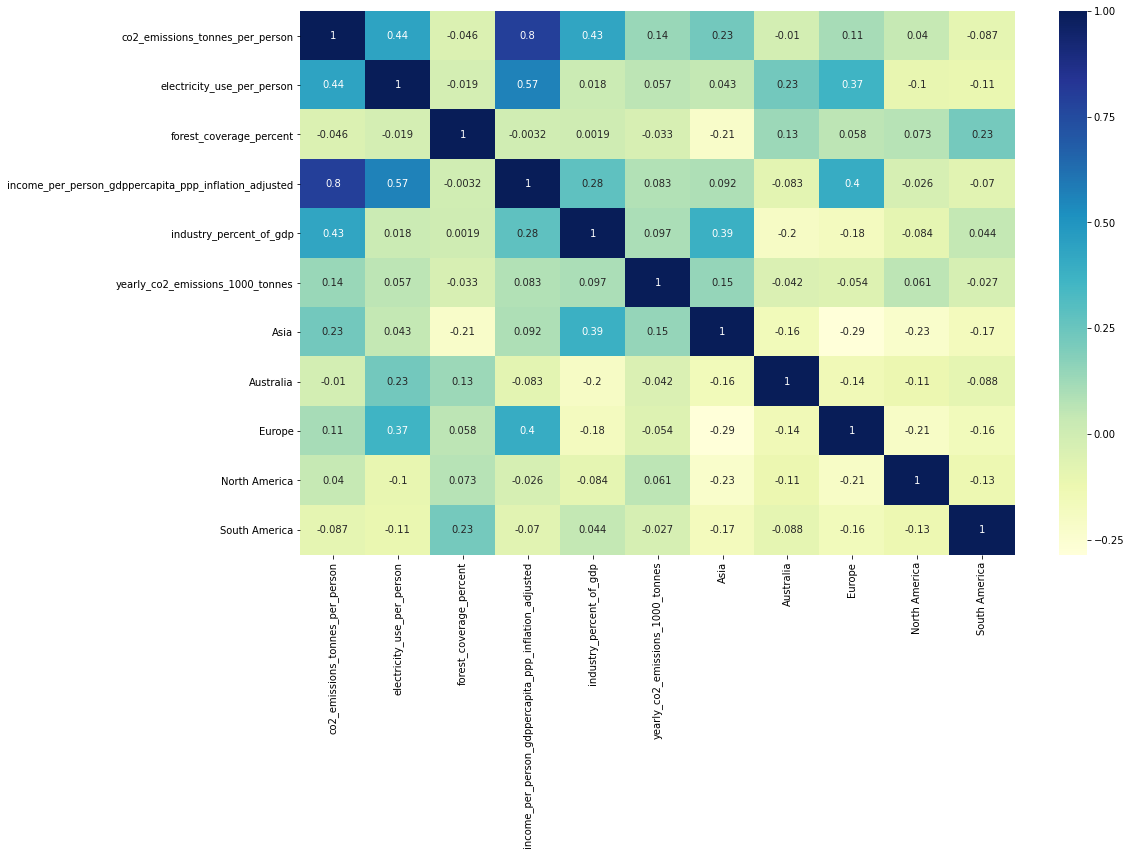

In [113]:
#lets see the correlation between the variables

# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu",)
plt.show()

<h2 style="color: #E3B340;"> Dividing into X and Y set

In [114]:
y_train=df_train.pop('co2_emissions_tonnes_per_person')
x_train=df_train

In [115]:
x_train.head()

electricity_use_per_person  forest_coverage_percent  \
28                     0.004315                 0.552391   
104                    0.005078                 0.039980   
29                     0.004501                 0.409969   
142                    0.177192                 0.614446   
96                     0.177192                 0.438454   

     income_per_person_gdppercapita_ppp_inflation_adjusted  \
28                                            0.019905       
104                                           0.009512       
29                                            0.018075       
142                                           0.039776       
96                                            0.024394       

     industry_percent_of_gdp  yearly_co2_emissions_1000_tonnes  continent  \
28                  0.292288                          0.000647       Asia   
104                 0.185973                          0.000136     Africa   
29                  0.316090                          0.000679     Africa   
142                 0.308156                          0.000018  Australia   
96                  0.514440                          0.000003     Europe   

     Asia  Australia  Europe  North America  South America  
28      1          0       0              0              0  
104     0          0       0              0              0  
29      0          0       0              0              0  
142     0          1       0              0              0  
96      0          0       1              0              0

In [116]:
#drop the categorical data continent
x_train.drop(['continent'],axis=1,inplace=True)
x_train.head()

C:\Users\kanan\AppData\Roaming\Python\Python36\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



electricity_use_per_person  forest_coverage_percent  \
28                     0.004315                 0.552391   
104                    0.005078                 0.039980   
29                     0.004501                 0.409969   
142                    0.177192                 0.614446   
96                     0.177192                 0.438454   

     income_per_person_gdppercapita_ppp_inflation_adjusted  \
28                                            0.019905       
104                                           0.009512       
29                                            0.018075       
142                                           0.039776       
96                                            0.024394       

     industry_percent_of_gdp  yearly_co2_emissions_1000_tonnes  Asia  \
28                  0.292288                          0.000647     1   
104                 0.185973                          0.000136     0   
29                  0.316090                          0.000679     0   
142                 0.308156                          0.000018     0   
96                  0.514440                          0.000003     0   

     Australia  Europe  North America  South America  
28           0       0              0              0  
104          0       0              0              0  
29           0       0              0              0  
142          1       0              0              0  
96           0       1              0              0

<h2 style="color: #E3B340;"> Lasso Model Building

In [117]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [118]:
lasso = Lasso()

In [119]:
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,69,75,85,100,500]}

In [120]:
lasso_model = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=10,
                           return_train_score=True,verbose=1)

In [121]:
lasso_model.fit(x_train,y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\kanan\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.239883441149459, tolerance: 0.5613564785556034

C:\Users\kanan\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.152379833406371, tolerance: 0.4632504303453224

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    2.2s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 69, 75, 85, 100,
                                   500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=1)

In [122]:
model_result = pd.DataFrame(lasso_model.cv_results_)
model_result.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.006467      0.001534         0.002323        0.000978       1e-15   
1       0.006135      0.001236         0.002448        0.000788       1e-10   
2       0.006453      0.001273         0.002643        0.000892       1e-08   
3       0.006503      0.001739         0.002413        0.000664       0.001   
4       0.006316      0.000949         0.002782        0.000592        0.01   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 1e-15}         -19.831430         -15.682779         -15.465015   
1  {'alpha': 1e-10}         -19.831430         -15.682779         -15.465015   
2  {'alpha': 1e-08}         -19.831430         -15.682776         -15.465013   
3  {'alpha': 0.001}         -19.778373         -15.377091         -15.304845   
4   {'alpha': 0.01}         -19.532624         -12.809698         -15.044468   

   split3_test_score  ...  split2_train_score  split3_train_score  \
0         -52.823128  ...          -11.662866           -7.612597   
1         -52.823128  ...          -11.662866           -7.612597   
2         -52.823128  ...          -11.662866           -7.612597   
3         -52.911273  ...          -11.663407           -7.612874   
4         -53.770333  ...          -11.712768           -7.640375   

   split4_train_score  split5_train_score  split6_train_score  \
0          -12.801103          -13.037095          -12.899252   
1          -12.801103          -13.037095          -12.899252   
2          -12.801103          -13.037095          -12.899252   
3          -12.801335          -13.037328          -12.899484   
4          -12.824361          -13.060409          -12.922465   

   split7_train_score  split8_train_score  split9_train_score  \
0          -12.158372          -12.667695          -11.552003   
1          -12.158372          -12.667695          -11.552003   
2          -12.158372          -12.667695          -11.552003   
3          -12.158644          -12.667923          -11.552264   
4          -12.182309          -12.690565          -11.578017   

   mean_train_score  std_train_score  
0        -11.798624         1.511897  
1        -11.798624         1.511897  
2        -11.798624         1.511897  
3        -11.798930         1.511875  
4        -11.826490         1.510469  

[5 rows x 31 columns]

In [123]:
print(lasso_model.best_params_)
print(lasso_model.best_score_)

{'alpha': 0.01}
-14.344395850254973


In [124]:
#ploting the mean 
model_result['param_alpha'] = model_result['param_alpha'].astype('float32')

In [125]:
model_result.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_alpha', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'split5_test_score', 'split6_test_score', 'split7_test_score',
       'split8_test_score', 'split9_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'split5_train_score', 'split6_train_score',
       'split7_train_score', 'split8_train_score', 'split9_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [126]:
fig = px.line(model_result,x='param_alpha',y='mean_train_score')
fig1 = px.line(model_result,x='param_alpha',y='mean_test_score')
fig.show()
fig1.show()

In [127]:
#using the best alpha 0.1
lasso_model2= Lasso(alpha=0.01)

In [128]:
lasso_model2.fit(x_train,y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [129]:
lasso_model2.coef_

array([ 0.68444777, -0.72656198, 31.68600447,  5.46436075,  1.4540792 ,
        1.06078791,  2.19348495, -1.97365913,  1.34116315, -0.40970537])

<h2 style="color: #E3B340;"> Test

In [130]:
df_test.head()

co2_emissions_tonnes_per_person  electricity_use_per_person  \
11                             6.320                      1505.0   
166                            4.290                      7520.0   
85                            14.200                      5600.0   
64                             0.537                       355.0   
110                            1.450                      9565.0   

     forest_coverage_percent  \
11                     51.50   
166                    31.60   
85                      1.23   
64                     40.90   
110                    91.80   

     income_per_person_gdppercapita_ppp_inflation_adjusted  \
11                                             22300.0       
166                                            56700.0       
85                                             23600.0       
64                                              3870.0       
110                                             3180.0       

     industry_percent_of_gdp  yearly_co2_emissions_1000_tonnes      continent  \
11                     13.90                            2420.0  North America   
166                    25.20                           35300.0         Europe   
85                     33.20                          248000.0           Asia   
64                     25.40                           14500.0         Africa   
110                     6.06                             150.0      Australia   

     Asia  Australia  Europe  North America  South America  
11      0          0       0              1              0  
166     0          0       1              0              0  
85      1          0       0              0              0  
64      0          0       0              0              0  
110     0          1       0              0              0

In [131]:
df_test[['electricity_use_per_person','forest_coverage_percent','income_per_person_gdppercapita_ppp_inflation_adjusted','industry_percent_of_gdp','yearly_co2_emissions_1000_tonnes']] = scaler.fit_transform(df_test[['electricity_use_per_person','forest_coverage_percent','income_per_person_gdppercapita_ppp_inflation_adjusted','industry_percent_of_gdp','yearly_co2_emissions_1000_tonnes']])

C:\Users\kanan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\kanan\AppData\Roaming\Python\Python36\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [132]:
df_test.head()

co2_emissions_tonnes_per_person  electricity_use_per_person  \
11                             6.320                    0.096642   
166                            4.290                    0.493407   
85                            14.200                    0.366759   
64                             0.537                    0.020785   
110                            1.450                    0.628301   

     forest_coverage_percent  \
11                  0.559322   
166                 0.341717   
85                  0.009623   
64                  0.443412   
110                 1.000000   

     income_per_person_gdppercapita_ppp_inflation_adjusted  \
11                                            0.272253       
166                                           0.703882       
85                                            0.288564       
64                                            0.041005       
110                                           0.032347       

     industry_percent_of_gdp  yearly_co2_emissions_1000_tonnes      continent  \
11                  0.167280                          0.001026  North America   
166                 0.333529                          0.015706         Europe   
85                  0.451228                          0.110666           Asia   
64                  0.336472                          0.006420         Africa   
110                 0.051935                          0.000013      Australia   

     Asia  Australia  Europe  North America  South America  
11      0          0       0              1              0  
166     0          0       1              0              0  
85      1          0       0              0              0  
64      0          0       0              0              0  
110     0          1       0              0              0

In [133]:
y_test=df_test.pop('co2_emissions_tonnes_per_person')
x_test=df_test

In [134]:
x_test.head()

electricity_use_per_person  forest_coverage_percent  \
11                     0.096642                 0.559322   
166                    0.493407                 0.341717   
85                     0.366759                 0.009623   
64                     0.020785                 0.443412   
110                    0.628301                 1.000000   

     income_per_person_gdppercapita_ppp_inflation_adjusted  \
11                                            0.272253       
166                                           0.703882       
85                                            0.288564       
64                                            0.041005       
110                                           0.032347       

     industry_percent_of_gdp  yearly_co2_emissions_1000_tonnes      continent  \
11                  0.167280                          0.001026  North America   
166                 0.333529                          0.015706         Europe   
85                  0.451228                          0.110666           Asia   
64                  0.336472                          0.006420         Africa   
110                 0.051935                          0.000013      Australia   

     Asia  Australia  Europe  North America  South America  
11      0          0       0              1              0  
166     0          0       1              0              0  
85      1          0       0              0              0  
64      0          0       0              0              0  
110     0          1       0              0              0

In [135]:
x_test.drop(['continent'],axis=1,inplace=True)

C:\Users\kanan\AppData\Roaming\Python\Python36\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [136]:
x_test.head()

electricity_use_per_person  forest_coverage_percent  \
11                     0.096642                 0.559322   
166                    0.493407                 0.341717   
85                     0.366759                 0.009623   
64                     0.020785                 0.443412   
110                    0.628301                 1.000000   

     income_per_person_gdppercapita_ppp_inflation_adjusted  \
11                                            0.272253       
166                                           0.703882       
85                                            0.288564       
64                                            0.041005       
110                                           0.032347       

     industry_percent_of_gdp  yearly_co2_emissions_1000_tonnes  Asia  \
11                  0.167280                          0.001026     0   
166                 0.333529                          0.015706     0   
85                  0.451228                          0.110666     1   
64                  0.336472                          0.006420     0   
110                 0.051935                          0.000013     0   

     Australia  Europe  North America  South America  
11           0       0              1              0  
166          0       1              0              0  
85           0       0              0              0  
64           0       0              0              0  
110          1       0              0              0

In [137]:
pred_lasso = lasso_model2.predict(x_test)

Text(0.5, 1.0, 'actual - predicted')

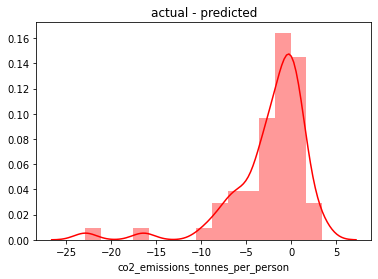

In [138]:
sns.distplot(y_test-pred_lasso,color='r')
plt.title("actual - predicted")

Text(0, 0.5, 'y_pred')

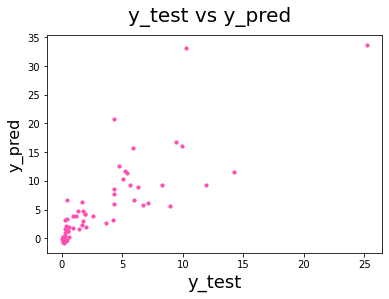

In [139]:
plt.scatter(y_test,pred_lasso,color=(1.0, 0.30, .69),s=10)

plt.suptitle('y_test vs y_pred', fontsize = 20,)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [144]:
lasso_model2.coef_

array([ 0.68444777, -0.72656198, 31.68600447,  5.46436075,  1.4540792 ,
        1.06078791,  2.19348495, -1.97365913,  1.34116315, -0.40970537])

<h2 style="color: #E3B340;"> This code is uploaded on<br> https://github.com/tenoob/Machine-Learning/tree/master/sem5/Assignmen1